In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Open train/test datasets
train_data = pd.read_csv("train.csv")
testing_data = pd.read_csv("test.csv")

## Exploratory Data Analysis

In [4]:
# Features with null values
features_w_na = [features for features in train_data.columns if train_data[features].isnull().sum() > 0]

for feature in features_w_na:
    print(feature, train_data[feature].isnull().sum(), 'null values')

LotFrontage 259 null values
Alley 1369 null values
MasVnrType 872 null values
MasVnrArea 8 null values
BsmtQual 37 null values
BsmtCond 37 null values
BsmtExposure 38 null values
BsmtFinType1 37 null values
BsmtFinType2 38 null values
Electrical 1 null values
FireplaceQu 690 null values
GarageType 81 null values
GarageYrBlt 81 null values
GarageFinish 81 null values
GarageQual 81 null values
GarageCond 81 null values
PoolQC 1453 null values
Fence 1179 null values
MiscFeature 1406 null values


In [190]:
# Numerical vars
numerical_feats = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
train_data[numerical_feats].head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [6]:
# Temporal Variables (datetime)
year_feats = [feature for feature in numerical_feats if 'Yr' in feature or 'Year' in feature]
year_feats

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0.5, 1.0, 'House Price vs. Year Sold')

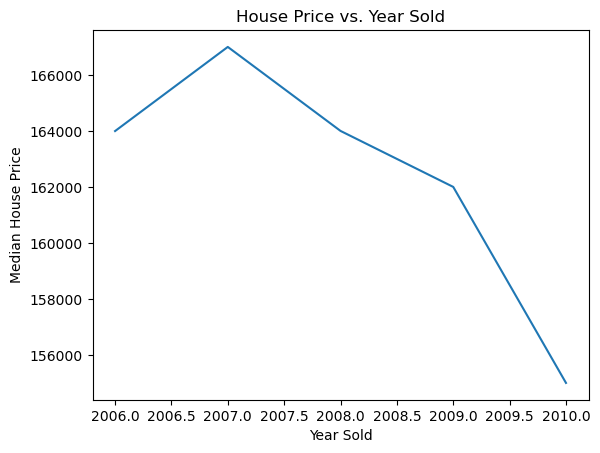

In [7]:
train_data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('House Price vs. Year Sold')

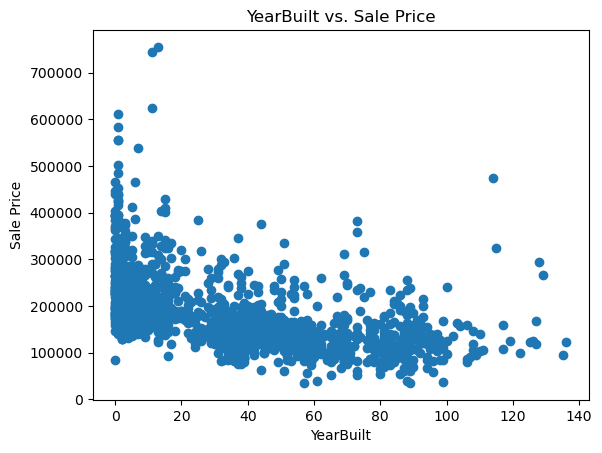

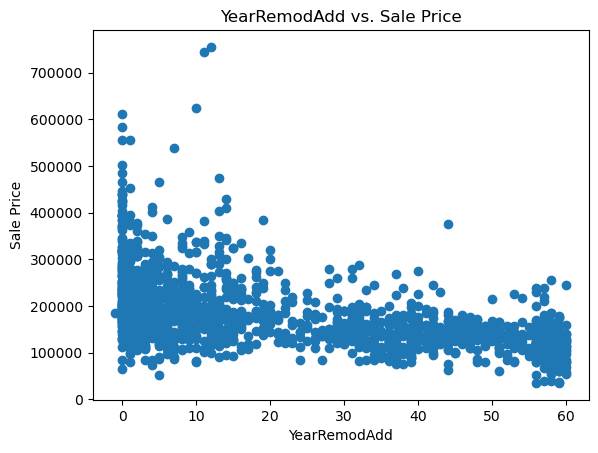

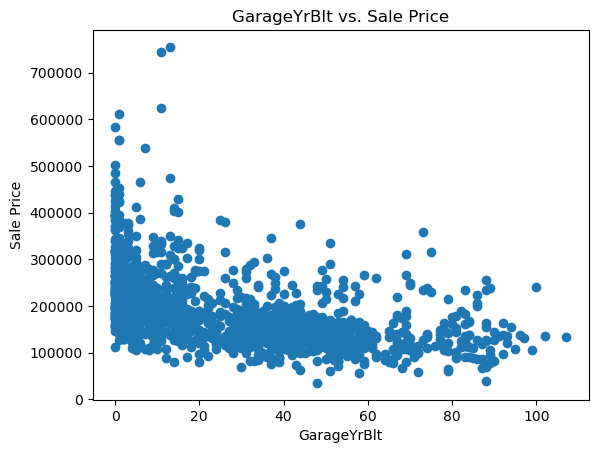

In [8]:
# Compare difference between year house was sold vs. year built/remod added/garage yr built
for feature in year_feats:
    if feature != 'YrSold':
        data = train_data.copy()
        data[feature] = data['YrSold']-data[feature]
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel("Sale Price")
        plt.title(str(feature) + " vs. Sale Price")
        plt.show()

Notice the trend where the smaller the difference YearSold has with YearBuilt, YearRemodAdd, and GarageYrBlt, the higher the Sale Price of the house.

In [10]:
# Discrete Vars
discrete_feats = [feature for feature in numerical_feats if train_data[feature].nunique() < 30 and feature not in year_feats]
print(str(len(discrete_feats)) + " discrete features:")
print(discrete_feats)

17 discrete features:
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


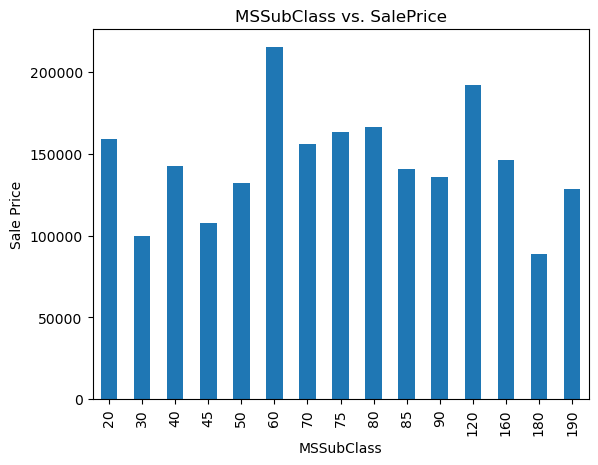

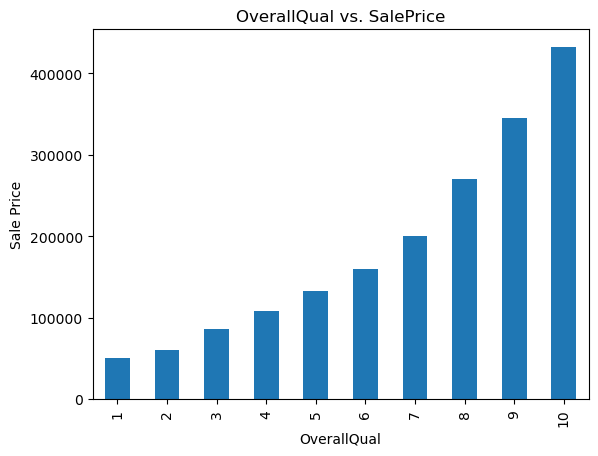

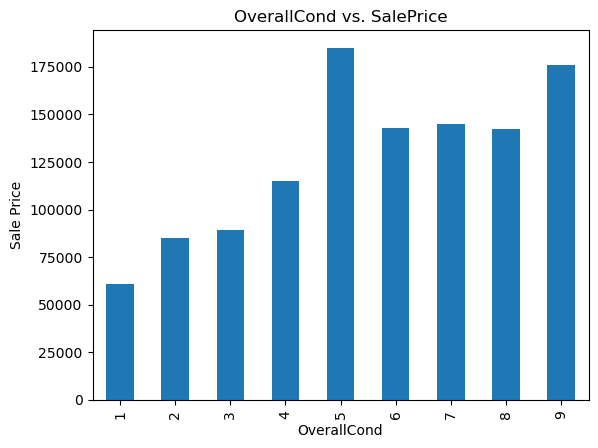

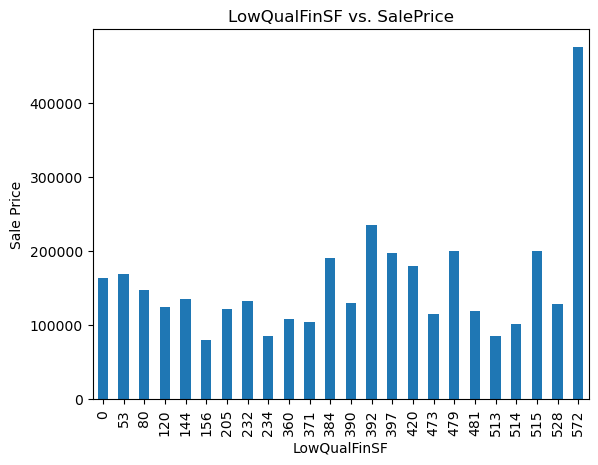

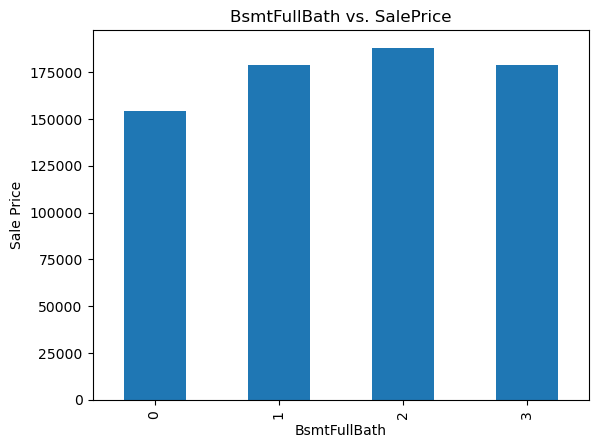

In [192]:
# Explore relationship between features and Sale Price
# Showing plots for 5 features
i = 0
for feat in discrete_feats:
    i += 1
    if i > 5:
        break
    data = train_data.copy()
    data.groupby(feat)['SalePrice'].median().plot.bar()
    plt.xlabel(feat)
    plt.ylabel('Sale Price')
    plt.title(feat + " vs. SalePrice")
    plt.show()

In [12]:
# Continuous Vars
cont_feats = [feature for feature in numerical_feats if feature not in discrete_feats + year_feats + ['Id']]
print(str(len(cont_feats)) + " continuous features:")
print(cont_feats)

16 continuous features:
['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


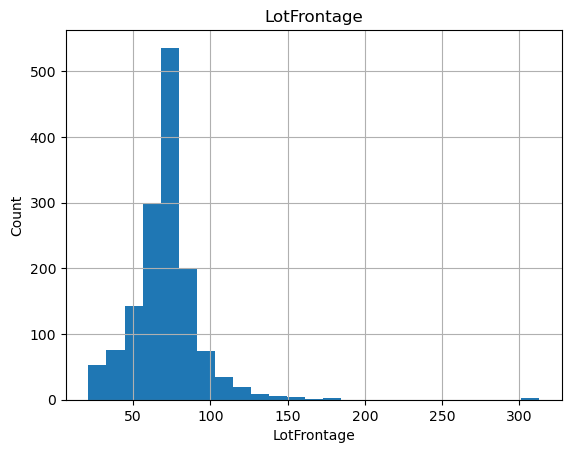

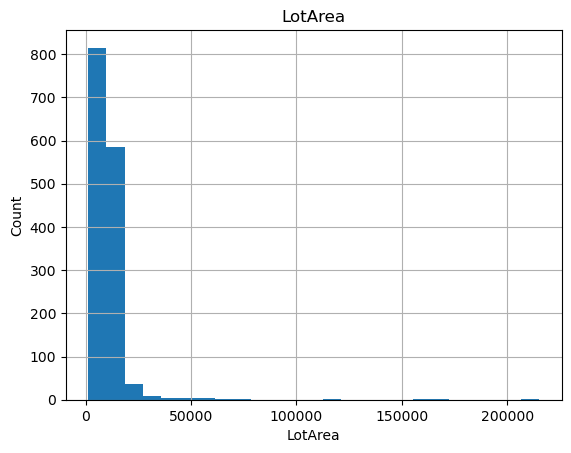

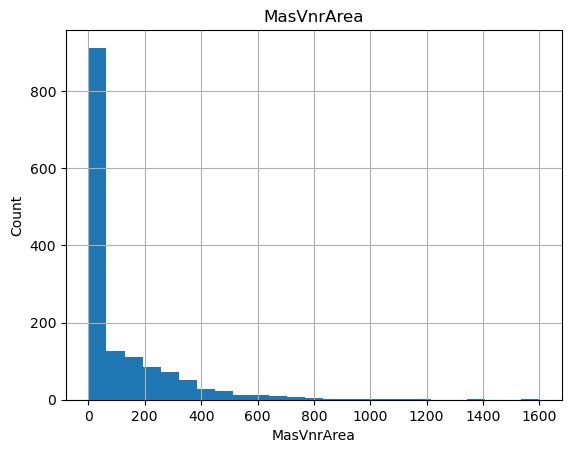

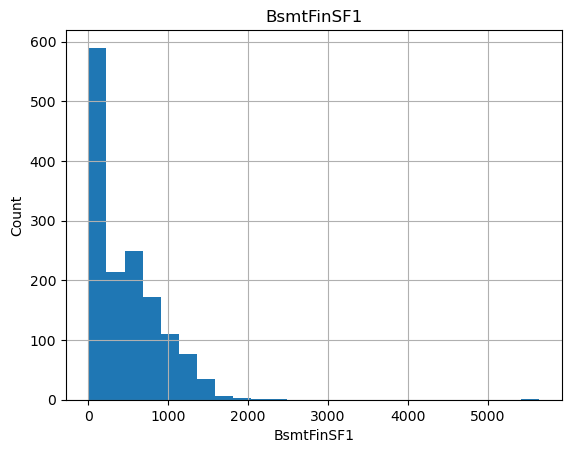

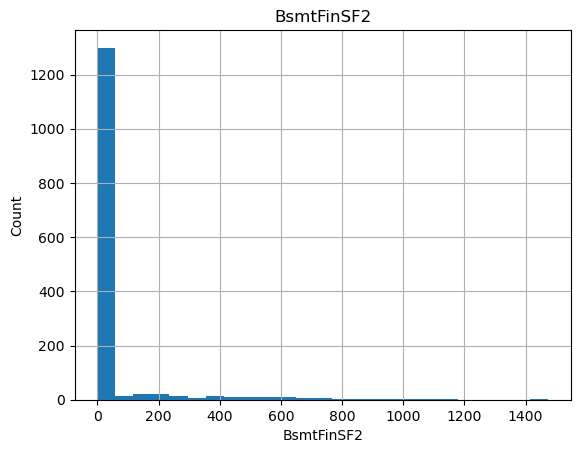

In [194]:
# Explore relationship between features and Sale Price
# Showing 5 plots
i = 0
for feat in cont_feats:
    i += 1
    if i > 5:
        break
    data = train_data.copy()
    data[feat].hist(bins=25)
    plt.xlabel(feat)
    plt.ylabel('Count')
    plt.title(feat)
    plt.show()

Many of the histograms for the continuous variables have a right skew and should be transformed to more closely follow a normal distribution by performing a logarithmic transformation.

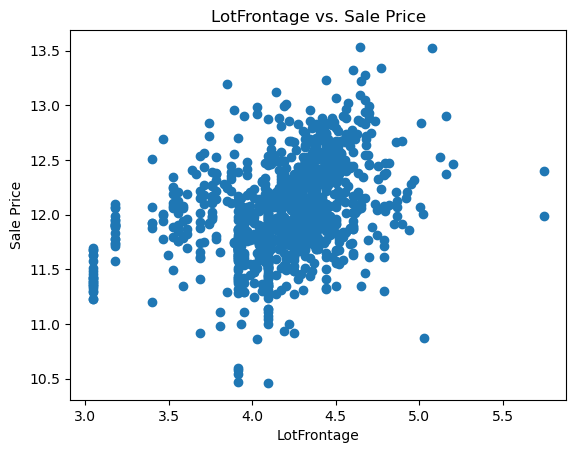

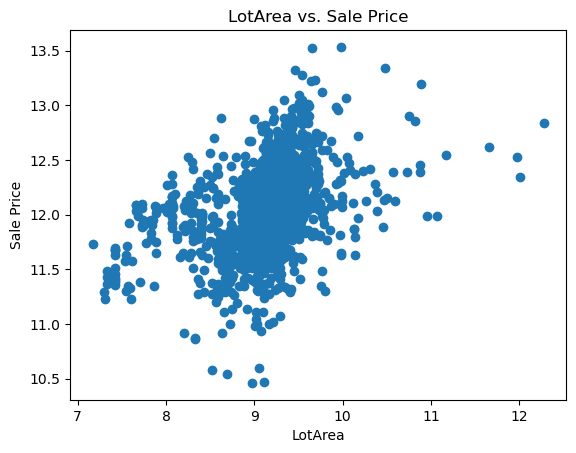

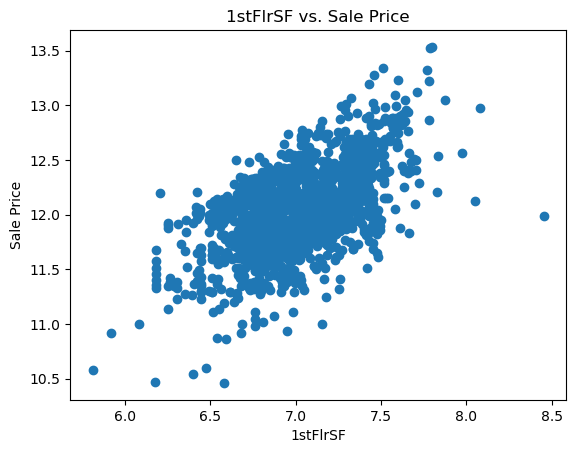

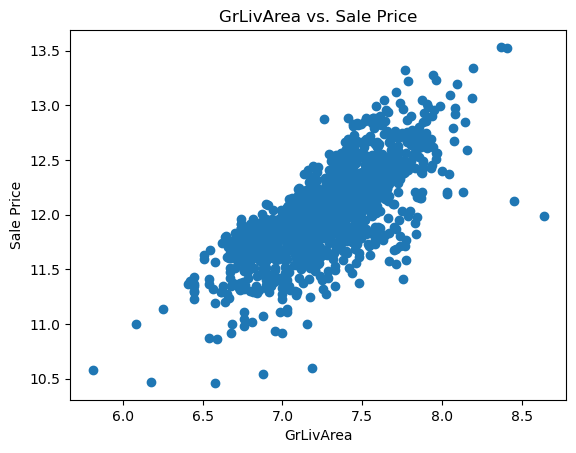

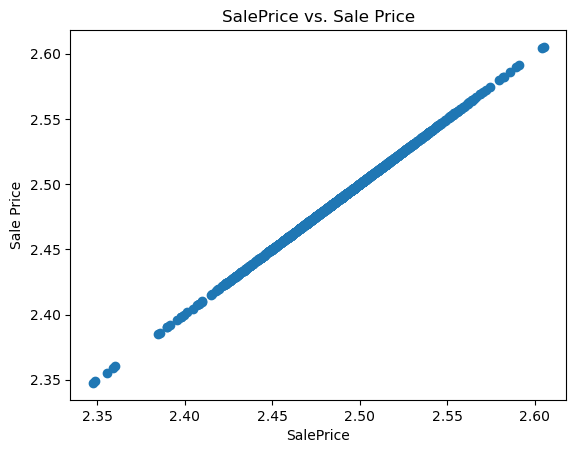

In [15]:
for feat in cont_feats:
    data = train_data.copy()
    
    # Avoid transforming data w/ counts
    if 0 in data[feat].unique():
        continue
        
    data[feat] = np.log(data[feat])
    data['SalePrice'] = np.log(data['SalePrice'])
    plt.scatter(data[feat], data['SalePrice'])
    plt.xlabel(feat)
    plt.ylabel('Sale Price')
    plt.title(feat + " vs. Sale Price")
    plt.show()
    

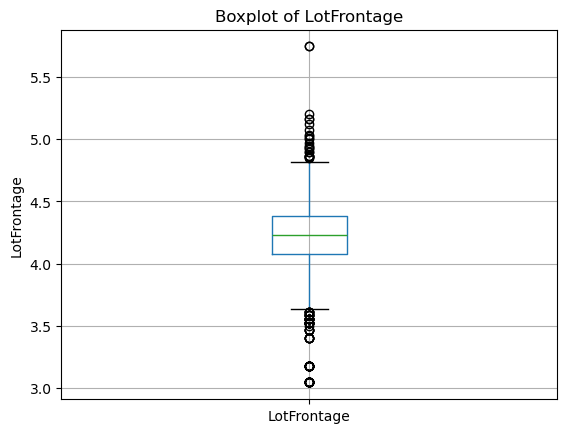

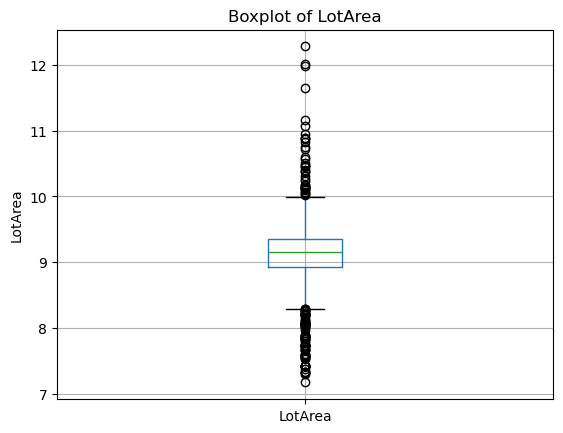

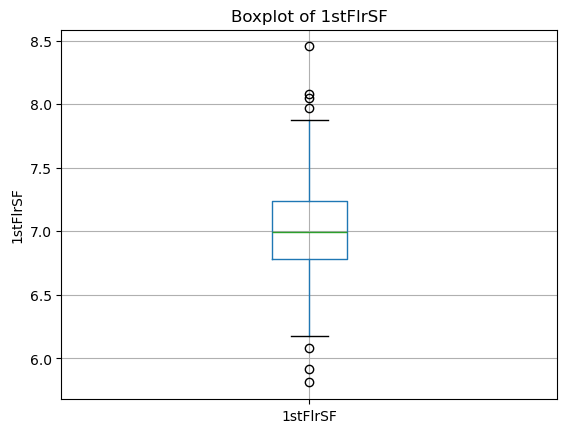

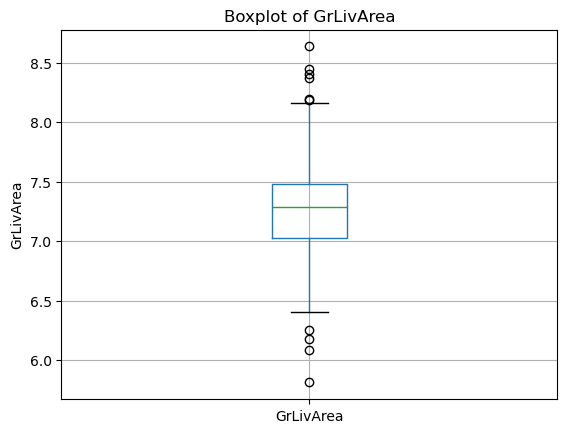

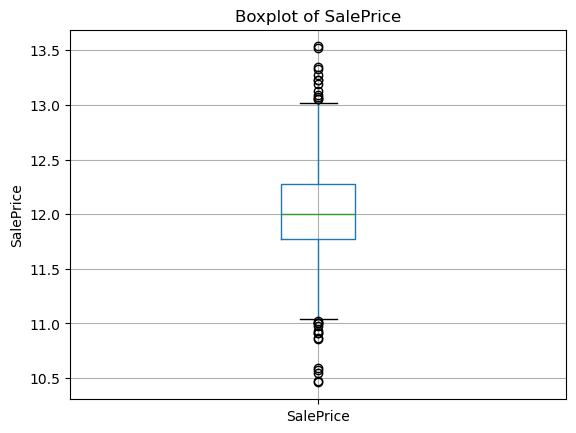

In [16]:
# Explore outliers (outside 3 sd of mean)
for feat in cont_feats:
    data = train_data.copy()
    
    if 0 in data[feat].unique():
        continue
        
    data[feat] = np.log(data[feat])
    data.boxplot(column=feat)
    plt.ylabel(feat)
    plt.title("Boxplot of " + feat)
    plt.show()

In [17]:
# Categorical Vars
categorical_feats = [feature for feature in train_data.columns if data[feature].dtypes == 'O']
print(str(len(categorical_feats)) + " Categorical Features:")
print(categorical_feats)

43 Categorical Features:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [18]:
train_data[categorical_feats].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [19]:
for feat in categorical_feats:
    print(feat + " has " + str(train_data[feat].nunique()) + " different categories")

MSZoning has 5 different categories
Street has 2 different categories
Alley has 2 different categories
LotShape has 4 different categories
LandContour has 4 different categories
Utilities has 2 different categories
LotConfig has 5 different categories
LandSlope has 3 different categories
Neighborhood has 25 different categories
Condition1 has 9 different categories
Condition2 has 8 different categories
BldgType has 5 different categories
HouseStyle has 8 different categories
RoofStyle has 6 different categories
RoofMatl has 8 different categories
Exterior1st has 15 different categories
Exterior2nd has 16 different categories
MasVnrType has 3 different categories
ExterQual has 4 different categories
ExterCond has 5 different categories
Foundation has 6 different categories
BsmtQual has 4 different categories
BsmtCond has 4 different categories
BsmtExposure has 4 different categories
BsmtFinType1 has 6 different categories
BsmtFinType2 has 6 different categories
Heating has 6 different c

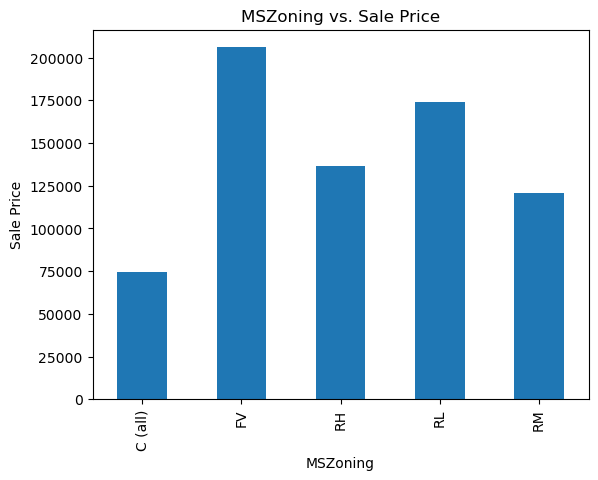

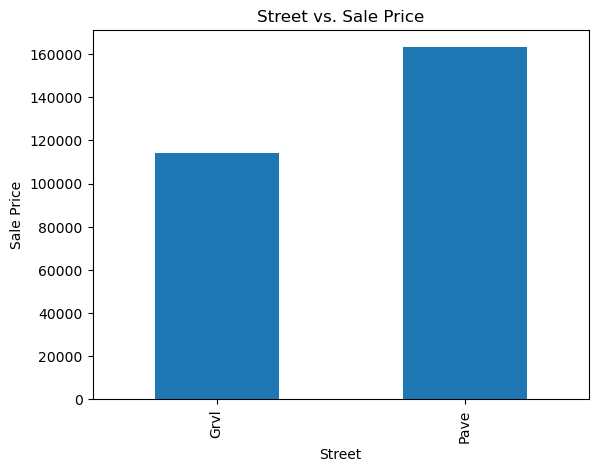

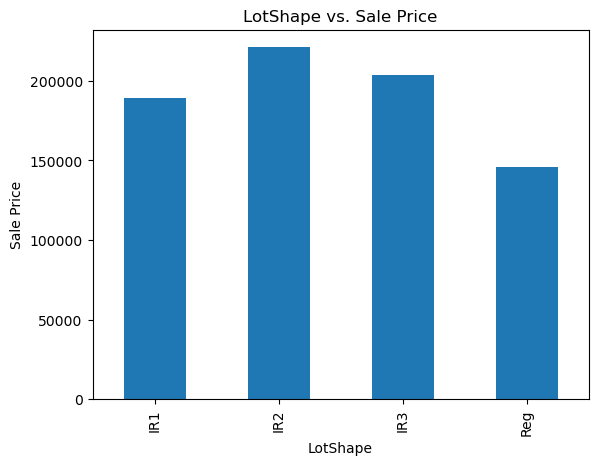

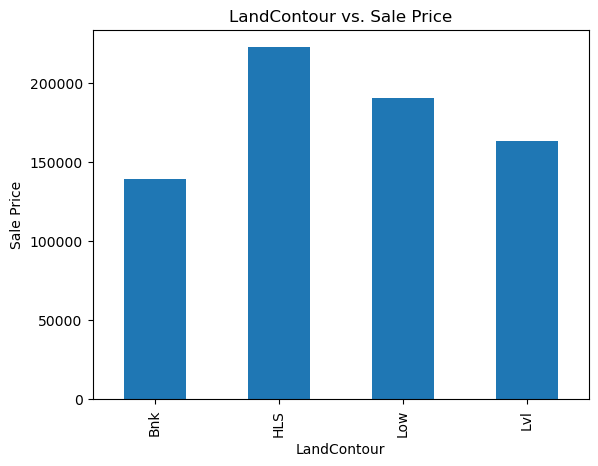

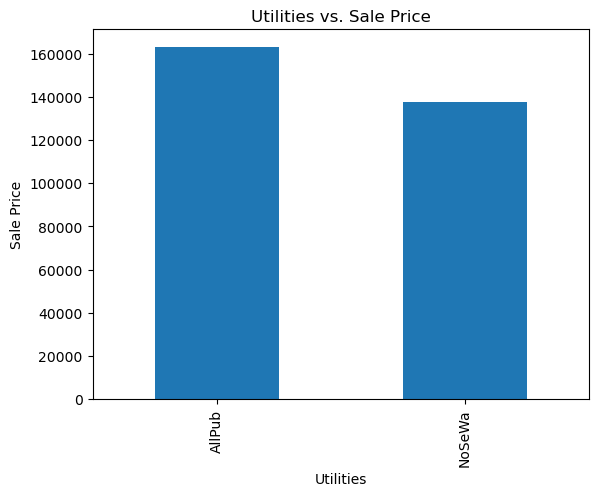

In [196]:
# Explore relationship between categorical vars and Sale Price
# Showing 5 plots
i = 0
for feature in categorical_feats:
    i += 1
    if i > 5:
        break
    data = train_data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Sale Price")
    plt.title(feature + " vs. Sale Price")
    plt.show()

In [21]:
# Handle null values for train AND test data (numerical data)
# Filling null values with mean/mode depending on data type
# train_data[discrete_feats].info()
# train_data[cont_feats].info()
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())

# Test data has missing vals for LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, GarageArea (continuous)
# and BsmtFullBath, BsmtHalfBath, GarageCars (discrete)
cont_feats_test = [feature for feature in numerical_feats if feature not in discrete_feats + year_feats + ['Id'] and feature != 'SalePrice']
# testing_data[cont_feats_test].info()
testing_data['LotFrontage'] = testing_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
testing_data['MasVnrArea'] = testing_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())
testing_data['BsmtFinSF1'] = testing_data['BsmtFinSF1'].fillna(train_data['BsmtFinSF1'].mean())
testing_data['BsmtFinSF2'] = testing_data['BsmtFinSF2'].fillna(train_data['BsmtFinSF2'].mean())
testing_data['BsmtUnfSF'] = testing_data['BsmtUnfSF'].fillna(train_data['BsmtUnfSF'].mean())
testing_data['TotalBsmtSF'] = testing_data['TotalBsmtSF'].fillna(train_data['TotalBsmtSF'].mean())
testing_data['GarageArea'] = testing_data['GarageArea'].fillna(train_data['GarageArea'].mean())
testing_data['BsmtFullBath'] = testing_data['BsmtFullBath'].fillna(train_data['BsmtFullBath'].mode()[0])
testing_data['BsmtHalfBath'] = testing_data['BsmtHalfBath'].fillna(train_data['BsmtHalfBath'].mode()[0])
testing_data['GarageCars'] = testing_data['GarageCars'].fillna(train_data['GarageCars'].mode()[0])

In [22]:
# Handle null values for categorical data (train)
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mode()[0])
train_data['BsmtQual'] = train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
train_data['BsmtCond'] = train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0])
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])
train_data['GarageType'] = train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])
train_data['GarageFinish'] = train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
train_data['GarageQual'] = train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])
train_data['GarageCond'] = train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])

# Handle null values for categorical data (test)
testing_data['GarageYrBlt'] = testing_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mode()[0])
testing_data['MSZoning'] = testing_data['MSZoning'].fillna(train_data['MSZoning'].mode()[0])
testing_data['Utilities'] = testing_data['Utilities'].fillna(train_data['Utilities'].mode()[0])
testing_data['Exterior1st'] = testing_data['Exterior1st'].fillna(train_data['Exterior1st'].mode()[0])
testing_data['Exterior2nd'] = testing_data['Exterior2nd'].fillna(train_data['Exterior2nd'].mode()[0])
testing_data['BsmtQual'] = testing_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
testing_data['BsmtCond'] = testing_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])
testing_data['BsmtExposure'] = testing_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])
testing_data['BsmtFinType1'] = testing_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0])
testing_data['BsmtFinType2'] = testing_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])
testing_data['KitchenQual'] = testing_data['KitchenQual'].fillna(train_data['KitchenQual'].mode()[0])
testing_data['Functional'] = testing_data['Functional'].fillna(train_data['Functional'].mode()[0])
testing_data['FireplaceQu'] = testing_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])
testing_data['GarageType'] = testing_data['GarageType'].fillna(train_data['GarageType'].mode()[0])
testing_data['GarageFinish'] = testing_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
testing_data['GarageQual'] = testing_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])
testing_data['GarageCond'] = testing_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])
testing_data['SaleType'] = testing_data['SaleType'].fillna(train_data['SaleType'].mode()[0])

# drop features with more than 50% null values
train_data.drop(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)
testing_data.drop(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [23]:
# Check that all null data is filled
print("Train: " + str(train_data.isnull().sum().sum()) + " Shape: " + str(train_data.shape))
print("Test: " + str(testing_data.isnull().sum().sum()) + " Shape: " + str(testing_data.shape))

Train: 0 Shape: (1460, 76)
Test: 0 Shape: (1459, 75)


When going back to improve the model, remember that there are other ways to fill null values.

In [25]:
# Recall: numerical_feats, discrete_feats, cont_feats, year_feats, and categorical_feats
# Categorical feats should exclude dropped columns:
dropped_feats = ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']
categorical_feats = [feat for feat in categorical_feats if feat not in dropped_feats]

def one_hot_encode_cat(cols):
    one_hot_df = combined_df
    i = 0
    for col in cols:
        df1 = pd.get_dummies(combined_df[col], drop_first=True)
        df1.columns = [f"{combined_df[col].name}_{col_name}" for col_name in df1.columns]
        combined_df.drop(columns=[col], inplace=True)
        if i == 0:
            one_hot_df = df1.copy()
        else:
            one_hot_df = pd.concat([one_hot_df, df1], axis=1)
        i += 1
    one_hot_df = pd.concat([combined_df, one_hot_df], axis=1)
    return one_hot_df

In [136]:
# Since some categories in testing_data might not be in train_data, so we concat and then one-hot encode
combined_df = pd.concat([train_data, testing_data], axis=0)
combined_df = one_hot_encode_cat(categorical_feats)

In [138]:
# Separate back into Train and test data
train_df = combined_df[:1460].copy()
test_df = combined_df[1460:].copy()
test_df.drop(columns=['SalePrice'], inplace=True)

## Begin Creating Models

In [141]:
from sklearn.model_selection import train_test_split
X_train0 = train_df.drop(['SalePrice'], axis=1)
X_train = X_train0.drop(['Id'], axis=1)
y_train = train_df['SalePrice']

### Lasso Linear Regression

In [182]:
from sklearn.linear_model import Lasso
lin_reg_lasso = Lasso(alpha=1.0)
lin_reg_lasso.fit(X_train, y_train)
y_pred1 = lin_reg_lasso.predict(test_df.drop(['Id'], axis=1))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.191e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


### XGBoost

In [184]:
import xgboost
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

classifier = xgboost.XGBRegressor()
classifier.fit(X_train, y_train)
y_pred2 = classifier.predict(test_df.drop(['Id'], axis=1))

### Random Forest

In [186]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=13)
rfr.fit(X_train, y_train)
y_pred3 = rfr.predict(test_df.drop(['Id'], axis=1))

### Voting Regressor

In [177]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Lasso
import xgboost
from sklearn.ensemble import RandomForestRegressor

lin_reg_lasso = Lasso(alpha=1.0)
xgbr = xgboost.XGBRegressor()
rfr = RandomForestRegressor(random_state=13)

vr = VotingRegressor([
    ('lasso', lin_reg_lasso),
    ('xgb', xgbr),
    ('rfr', rfr),
], weights=[3,1,2])

# Check RMSE through cross validation
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(vr, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print("Scores: " + str(-scores))

vr.fit(X_train, y_train)
y_pred4 = vr.predict(test_df.drop(['Id'], axis=1))
# kaggle score: 0.13439

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.305e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.474e+11, tolerance: 7.213e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.079e+11, toler

Scores: [34447.80066303 24551.63655315 46950.99615312 26695.44705448
 27999.01461809]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.191e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


In [158]:
pred = pd.DataFrame(y_pred4)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns=['Id', 'SalePrice']
datasets.to_csv('voting_reg.csv', index=False)

### VR #2

In [173]:
from sklearn.svm import SVR

lin_reg_lasso = Lasso(alpha=1.0)
xgbr = xgboost.XGBRegressor()
rfr = RandomForestRegressor(random_state=13)
svr_lin = SVR(kernel='linear')

vr2 = VotingRegressor([
    ('lasso', lin_reg_lasso),
    ('xgb', xgbr),
    ('rfr', rfr),
    ('svr', svr_lin)
], weights=[3,1,2, 4])

# Check RMSE through cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(vr2, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print("Scores: " + str(-scores))

vr2.fit(X_train, y_train)
y_pred6 = vr2.predict(test_df.drop(['Id'], axis=1))
# kaggle score: 0.14301

pred = pd.DataFrame(y_pred6)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns=['Id', 'SalePrice']
datasets.to_csv('voting_reg2.csv', index=False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.305e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.474e+11, tolerance: 7.213e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.079e+11, toler

Scores: [33294.84936411 26822.96121748 49084.12791598 27752.37785459
 23835.05539516]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.191e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


### Stacking Regressor

In [165]:
from sklearn.ensemble import StackingRegressor
estimators = [
    ('lasso', lin_reg_lasso),
    ('xgb', xgbr),
    ('rfr', rfr),
]

sr = StackingRegressor(
    estimators = estimators,
    final_estimator = rfr
)

# Check RMSE through cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(sr, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print("Scores: " + str(-scores))

sr.fit(X_train, y_train)
y_pred5 = sr.predict(test_df.drop(['Id'], axis=1))
# kaggle score: 0.13810

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.305e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.867e+11, tolerance: 5.696e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+11, toler

Scores: [34370.25501265 25899.68973595 51163.63518014 28060.14218071
 21239.20772379]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.191e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.403e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.117e+11, toler

In [167]:
pred = pd.DataFrame(y_pred5)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns=['Id', 'SalePrice']
datasets.to_csv('stacking_reg.csv', index=False)

### Stacking #2

In [179]:
from sklearn.ensemble import StackingRegressor
estimators = [
    ('lasso', lin_reg_lasso),
    ('xgb', xgbr),
    ('rfr', rfr),
]

sr2 = StackingRegressor(
    estimators = estimators,
    final_estimator = vr
)

# Check RMSE through cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(sr2, X_train, y_train, cv=kf, scoring='neg_root_mean_squared_error')
print("Scores: " + str(-scores))

sr2.fit(X_train, y_train)
y_pred7 = sr2.predict(test_df.drop(['Id'], axis=1))
# kaggle score: 0.13196 (Best so far!)

pred = pd.DataFrame(y_pred7)
sub_df = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df['Id'], pred], axis=1)
datasets.columns=['Id', 'SalePrice']
datasets.to_csv('stacking_reg2.csv', index=False)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.305e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.867e+11, tolerance: 5.696e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.478e+11, toler

Scores: [30974.39968864 27264.21215399 49387.52866401 25964.65313304
 21019.78504613]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.191e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.403e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.117e+11, toler

Next, look into hyperparameter tuning and other models